In [88]:
from cProfile import label
import matplotlib.pyplot as plt
import csv
import numpy as np
import pandas as pd
from sympy import *
import scipy as sp
import sys
sys.path.append('..')

from libka import *

In [89]:
df = pd.read_csv("in/capacity.csv", names = ["Tset", "T", "Cx pF"], header = 0)
A = 20 * 10**(-6) # m^2
d = 0.8 * 10**(-3) # m
e0 = 8.854e-12 # F/m
TK = 273.15 # K
PODZIALKA_CX = 5 # pF

In [90]:
df.insert(2, "TK", df["T"] + TK)
df.insert(3, "uT K", 0.1/np.sqrt(3))

df["uCx pF"] = typeB(PODZIALKA_CX, PODZIALKA_CX/2)
df["Cx F"] = df["Cx pF"] * 10**(-12)
df["uCx F"] = df["uCx pF"] * 10**(-12)

df["eps"] = df["Cx F"] * d / A /  e0 
df["ueps"] = d/A/e0 * df["uCx F"]

df["chi"] = df["eps"] - 1
df["uchi"] = df["ueps"]

df["1/chi"] = 1 / df["chi"]
df["u1/chi"] = df["uchi"] / df["chi"]**2

In [91]:
df

,Tset,T,TK,uT K,Cx pF,uCx pF,Cx F,uCx F,eps,ueps,chi,uchi,1/chi,u1/chi
0,24,26.8,299.95,0.057735,30,3.227486,3.000000e-11,3.227486e-12,135.531963,14.580918,134.531963,14.580918,0.007433,0.000806
1,28,27.6,300.75,0.057735,30,3.227486,3.000000e-11,3.227486e-12,135.531963,14.580918,134.531963,14.580918,0.007433,0.000806
2,32,31.2,304.35,0.057735,34,3.227486,3.400000e-11,3.227486e-12,153.602891,14.580918,152.602891,14.580918,0.006553,0.000626
3,33,32.3,305.45,0.057735,34,3.227486,3.400000e-11,3.227486e-12,153.602891,14.580918,152.602891,14.580918,0.006553,0.000626
4,34,33.2,306.35,0.057735,34,3.227486,3.400000e-11,3.227486e-12,153.602891,14.580918,152.602891,14.580918,0.006553,0.000626
5,36,35.2,308.35,0.057735,36,3.227486,3.600000e-11,3.227486e-12,162.638356,14.580918,161.638356,14.580918,0.006187,0.000558
6,38,37.2,310.35,0.057735,37,3.227486,3.700000e-11,3.227486e-12,167.156088,14.580918,166.156088,14.580918,0.006018,0.000528
7,40,39.1,312.25,0.057735,39,3.227486,3.900000e-11,3.227486e-12,176.191552,14.580918,175.191552,14.580918,0.005708,0.000475
8,42,41.1,314.25,0.057735,41,3.227486,4.100000e-11,3.227486e-12,185.227016,14.580918,184.227016,14.580918,0.005428,0.000430
9,46,44.9,318.05,0.057735,47,3.227486,4.700000e-11,3.227486e-12,212.333409,14.580918,211.333409,14.580918,0.004732,0.000326


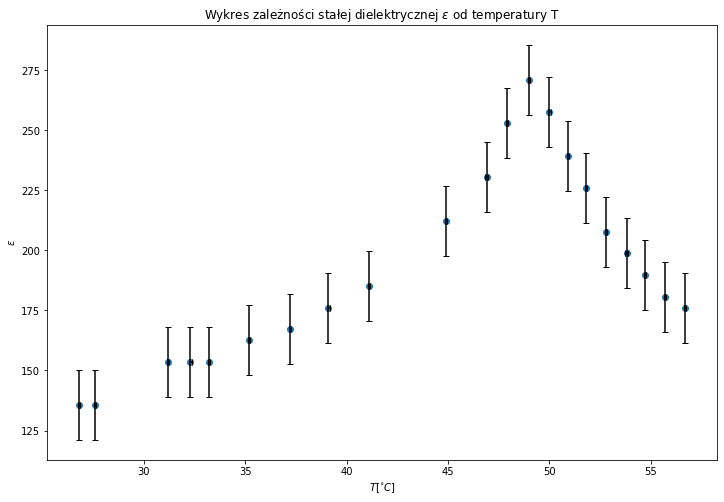

In [92]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(df["T"], df["eps"], label = "eps")

ax.errorbar(df["T"], df["eps"], xerr = df["uT K"], yerr = df["ueps"], fmt = "none", label = "eps", capsize=3, ecolor="black")

ax.set_title("Wykres zależności stałej dielektrycznej $\epsilon$ od temperatury T")
ax.set_xlabel(r"$T[^{\circ}C]$")
ax.set_ylabel(r"$\epsilon$")

fig.savefig("out/eps.jpg", dpi = 1600)
plt.show()

In [93]:
a, b, ua, ub, chi2 = least_squares(df["T"][12:], df["1/chi"][12:], df["u1/chi"][12:], 12, 20)
# a, b, ua, ub, chi2 = least_squares(df["T"][12:], df["1/chi"][12:], df["u1/chi"][12:], 12, 20)
print("a = ", a, "ua = ", ua)
print("b = ", b, "ub = ", ub)
print("chi2 = ", chi2)

xTc = -b/a
uxTc=np.sqrt((1/a*ub)**2+(b/a/a*ua)**2)
print("temp Curie from least squares = ", xTc, "niepewnosc uxTc: ", uxTc)
Cc = 1/a # look at the formula
uCc = ua/a**2
print("Cc = ", Cc, "uCc = ", uCc)

a =  0.00027945982571935094 ua =  4.35109063935244e-05
b =  -0.01001744299043123 ub =  0.002239557879274924
chi2 =  3.1849853641689805
temp Curie from least squares =  35.84573548146166 niepewnosc uxTc:  9.765780061330691
Cc =  3578.3318672940686 uCc =  557.133614901616


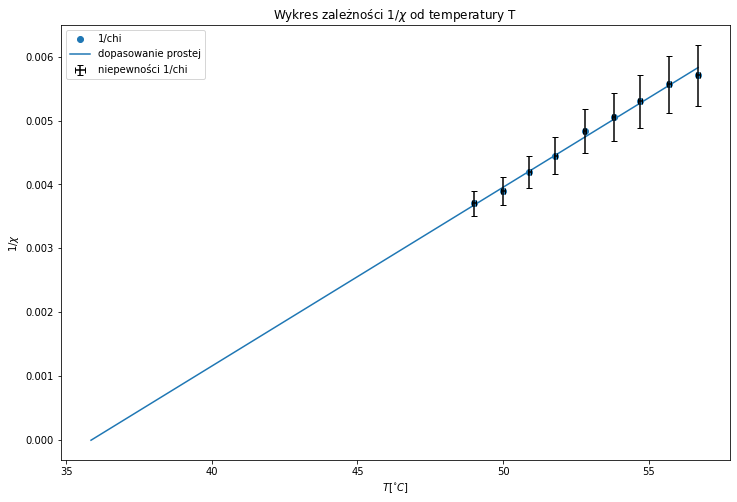

In [94]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(df["T"][12:], df["1/chi"][12:], label = "1/chi")
ax.plot([xTc, df["T"][20]], [a*xTc+b,a*df["T"][20]+b], label = "dopasowanie prostej")

ax.errorbar(df["T"][12:], df["1/chi"][12:], xerr = df["uT K"][12:], yerr = df["u1/chi"][12:], fmt = "none", label = "niepewności 1/chi", capsize=3, ecolor="black")

ax.set_title("Wykres zależności $1/\chi$ od temperatury T")
ax.set_xlabel(r"$T[^{\circ}C]$")
ax.set_ylabel(r"$1/\chi$")
ax.legend(loc=2)

fig.savefig("out/chi-1.jpg", dpi = 1600)
plt.show()